<a href="https://colab.research.google.com/github/rishit020/rishit-ml-portfolio/blob/main/supervised-learning/BreastCancerClassification/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('breast_cancer.csv')
df.head(15
        )

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

df.drop(columns=['differentiate'], inplace=True)
x = df.drop(columns=['Status'])
y = df['Status']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [9]:
binary_map = {'Positive': 1, 'Negative': 0}

df['Estrogen Status'] = df['Estrogen Status'].map(binary_map)
df['Progesterone Status'] = df['Progesterone Status'].map(binary_map)

In [13]:
status_map = {
    'Alive': 1,
    'Dead': 0
}

df['Status'] = df['Status'].map(status_map)

In [20]:
a_stage_map = {
    'Regional': 0,
    'Distant': 1
}

df['A Stage'] = df['A Stage'].map(a_stage_map)

In [ ]:
df.drop('Survival Months', axis=1, inplace=True)

In [31]:
t_stage_map = {
    'T1': 1,
    'T2': 2,
    'T3': 3,
    'T4': 4
}

df['T Stage '] = df['T Stage '].map(t_stage_map)

In [33]:
n_stage_map = {
    'N0': 0,
    'N1': 1,
    'N2': 2,
    'N3': 3
}

df['N Stage'] = df['N Stage'].map(n_stage_map)

In [36]:
sixth_stage_map = {
    'IIA': 1,
    'IIB': 2,
    'IIIA': 3,
    'IIIB': 4,
    'IIIC': 5
}

df['6th Stage'] = df['6th Stage'].map(sixth_stage_map)

In [53]:
differentiate_map = {
    'Well differentiated': 1,
    'Moderately differentiated': 2,
    'Poorly differentiated': 3,
    'Undifferentiated': 4
}

df['differentiate'] = df['differentiate'].map(differentiate_map)

grade_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    ' anaplastic; Grade IV': 4
}
df['Grade'] = df['Grade'].map(grade_map)

In [41]:
df = pd.get_dummies(df, columns=['Race', 'Marital Status'], drop_first=True)

In [42]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,68,1,1,1,3,3,0,4,1,1,24,1,1,False,True,True,False,False,False
1,50,2,2,3,2,2,0,35,1,1,14,5,1,False,True,True,False,False,False
2,58,3,3,5,2,2,0,63,1,1,14,7,1,False,True,False,False,False,False
3,58,1,1,1,3,3,0,18,1,1,2,1,1,False,True,True,False,False,False
4,47,2,1,2,3,3,0,41,1,1,3,1,1,False,True,True,False,False,False


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       4024 non-null   int64 
 1   T Stage                   4024 non-null   int64 
 2   N Stage                   4024 non-null   int64 
 3   6th Stage                 4024 non-null   int64 
 4   differentiate             4024 non-null   int64 
 5   Grade                     4024 non-null   object
 6   A Stage                   4024 non-null   int64 
 7   Tumor Size                4024 non-null   int64 
 8   Estrogen Status           4024 non-null   int64 
 9   Progesterone Status       4024 non-null   int64 
 10  Regional Node Examined    4024 non-null   int64 
 11  Reginol Node Positive     4024 non-null   int64 
 12  Status                    4024 non-null   int64 
 13  Race_Other                4024 non-null   bool  
 14  Race_White              

In [58]:
print(df.isnull().sum())

Age                            0
T Stage                        0
N Stage                        0
6th Stage                      0
differentiate               4024
Grade                          0
A Stage                        0
Tumor Size                     0
Estrogen Status                0
Progesterone Status            0
Regional Node Examined         0
Reginol Node Positive          0
Status                         0
Race_Other                     0
Race_White                     0
Marital Status_Married         0
Marital Status_Separated       0
Marital Status_Single          0
Marital Status_Widowed         0
dtype: int64


In [52]:
print(df['Grade'].unique())

['3' '2' '1' ' anaplastic; Grade IV']


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
pipeline = Pipeline([
    ('preprocessor', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', max_depth=5, class_weight='balanced', random_state=42))
])

In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Test Set ROC AUC: {roc_auc:.4f}")

Test Set Accuracy: 0.7652
Test Set ROC AUC: 0.7654


In [77]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=4,
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])

In [78]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Test Set ROC AUC: {roc_auc:.4f}")

Test Set Accuracy: 0.8646
Test Set ROC AUC: 0.7705


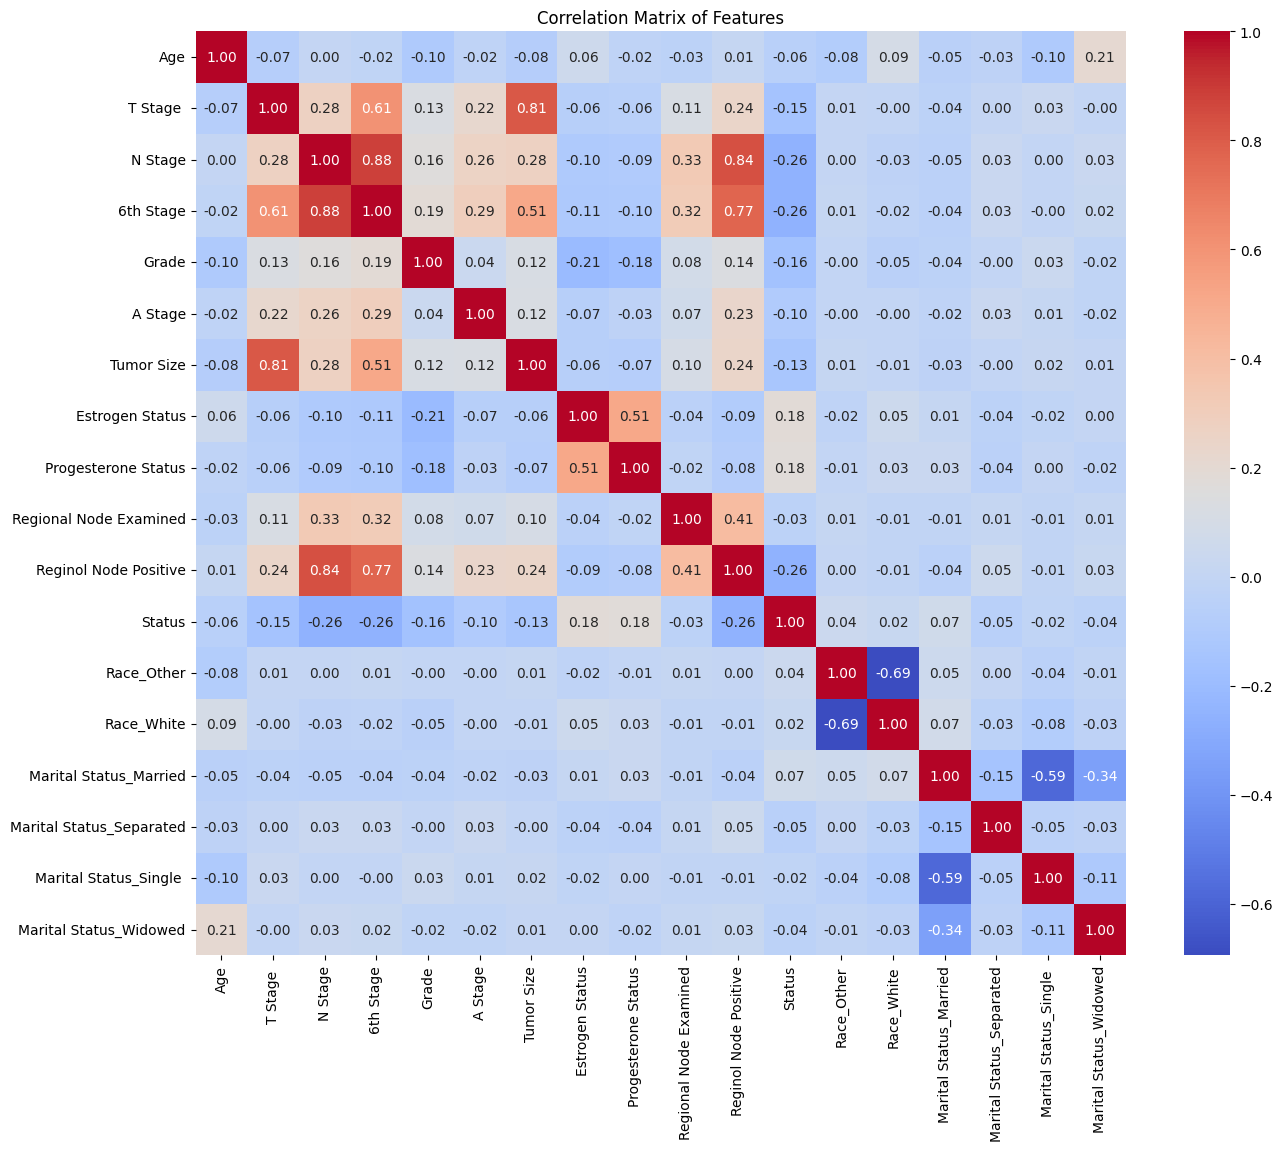

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

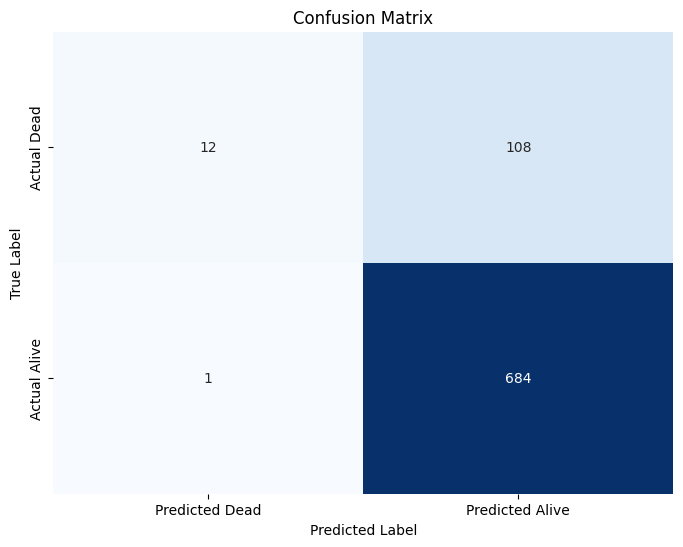

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Dead', 'Predicted Alive'],
            yticklabels=['Actual Dead', 'Actual Alive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [82]:
from sklearn.metrics import classification_report

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred, target_names=['Dead', 'Alive']))

Classification Report for Test Set:
              precision    recall  f1-score   support

        Dead       0.92      0.10      0.18       120
       Alive       0.86      1.00      0.93       685

    accuracy                           0.86       805
   macro avg       0.89      0.55      0.55       805
weighted avg       0.87      0.86      0.82       805



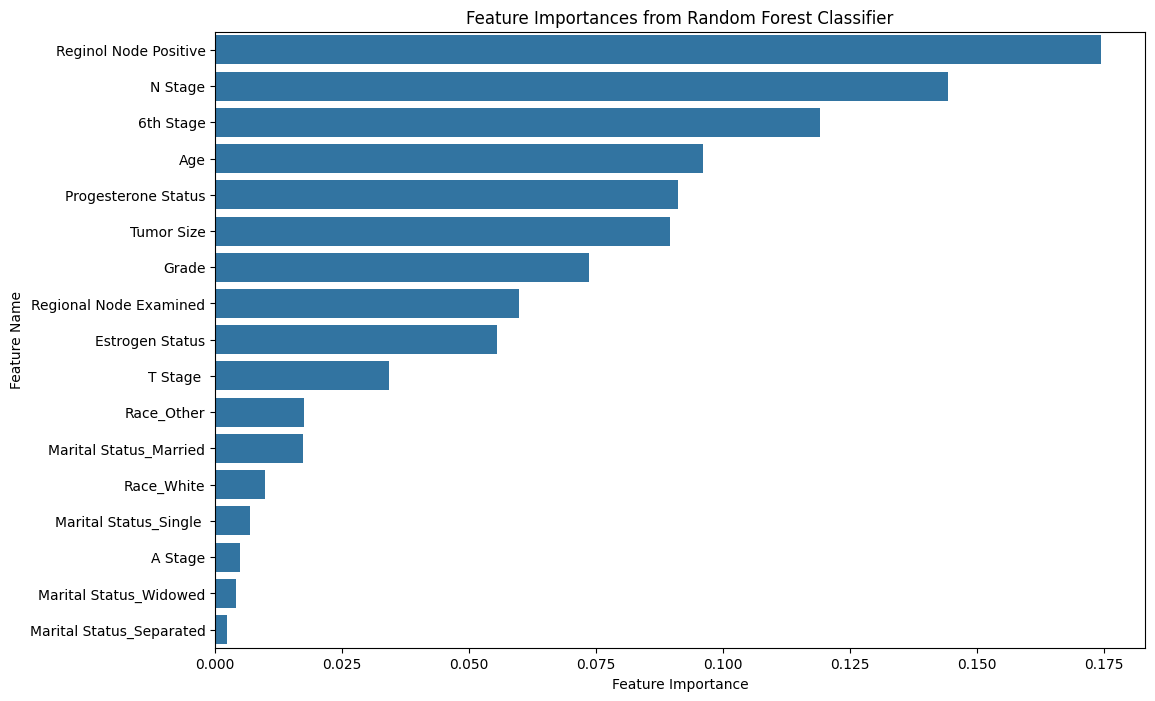

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# 2. Create a list of feature names
feature_names = x_train.columns

# 3. Combine the feature names and their importances into a pandas Series
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 4. Sort the features by their importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 5. Use seaborn.barplot to create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# 6. Add a title to the plot
plt.title('Feature Importances from Random Forest Classifier')

# 7. Label the x-axis and y-axis
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

# 8. Display the plot
plt.show()

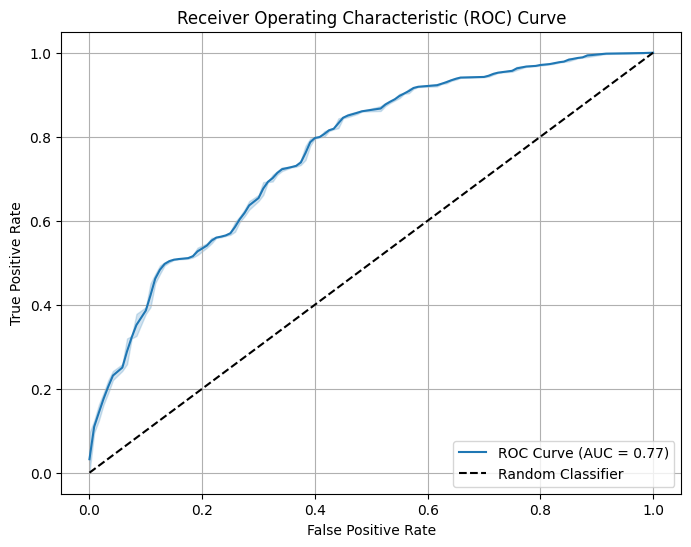

The AUC score for the RandomForestClassifier is: 0.7654


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for the positive class
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"The AUC score for the RandomForestClassifier is: {roc_auc:.4f}")

## Generate Precision-Recall Curve

### Subtask:
Generate a Precision-Recall curve for the trained `RandomForestClassifier` model to assess its performance, especially in imbalanced datasets.

**Reasoning**:
To generate the Precision-Recall curve, I need to use `precision_recall_curve` from `sklearn.metrics` and plot it using `matplotlib`. This will allow us to assess the model's performance on the positive class, which is particularly useful for imbalanced datasets.



<Figure size 800x600 with 0 Axes>

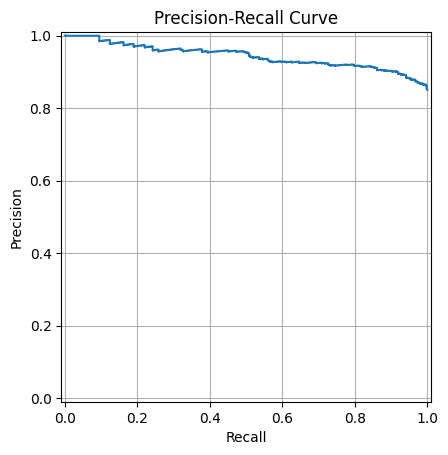

In [87]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

## Summary of Analysis and Insights

Based on the analysis of the `RandomForestClassifier` model, including the Feature Importance plot, ROC curve, and Precision-Recall curve, we can draw the following insights:

1.  **Feature Importance**: The feature importance plot revealed that `Reginol Node Positive`, `N Stage`, `6th Stage`, `Age`, and `Progesterone Status` are among the most influential features for predicting breast cancer status. This suggests that these clinical and demographic factors play a significant role in the model's decision-making.

2.  **ROC Curve and AUC Score**: The Receiver Operating Characteristic (ROC) curve and its Area Under the Curve (AUC) score provide a measure of the model's ability to distinguish between positive and negative classes. An AUC of 0.7654 indicates that the model has a reasonably good discriminatory power. The curve visually confirms the trade-off between the true positive rate and the false positive rate at various threshold settings.

3.  **Precision-Recall Curve**: The Precision-Recall curve helps assess the model's performance, especially for the positive class (in this case, 'Dead' status), which might be imbalanced. This curve shows the trade-off between precision and recall at different thresholds. A higher curve indicates better performance, particularly when minimizing false positives or false negatives is crucial. The shape of the curve provides insight into how well the model performs on the minority class.

In conclusion, the `RandomForestClassifier` model demonstrates a moderate ability to predict breast cancer status, with certain features significantly contributing to its predictions. The evaluation metrics (Accuracy, ROC AUC, and Classification Report) along with the generated plots provide a comprehensive view of the model's performance.